# Movie Domain Generated SDK

In this example, we will generate and demonstrate the use of a domain specific SDK for the data modele given below.

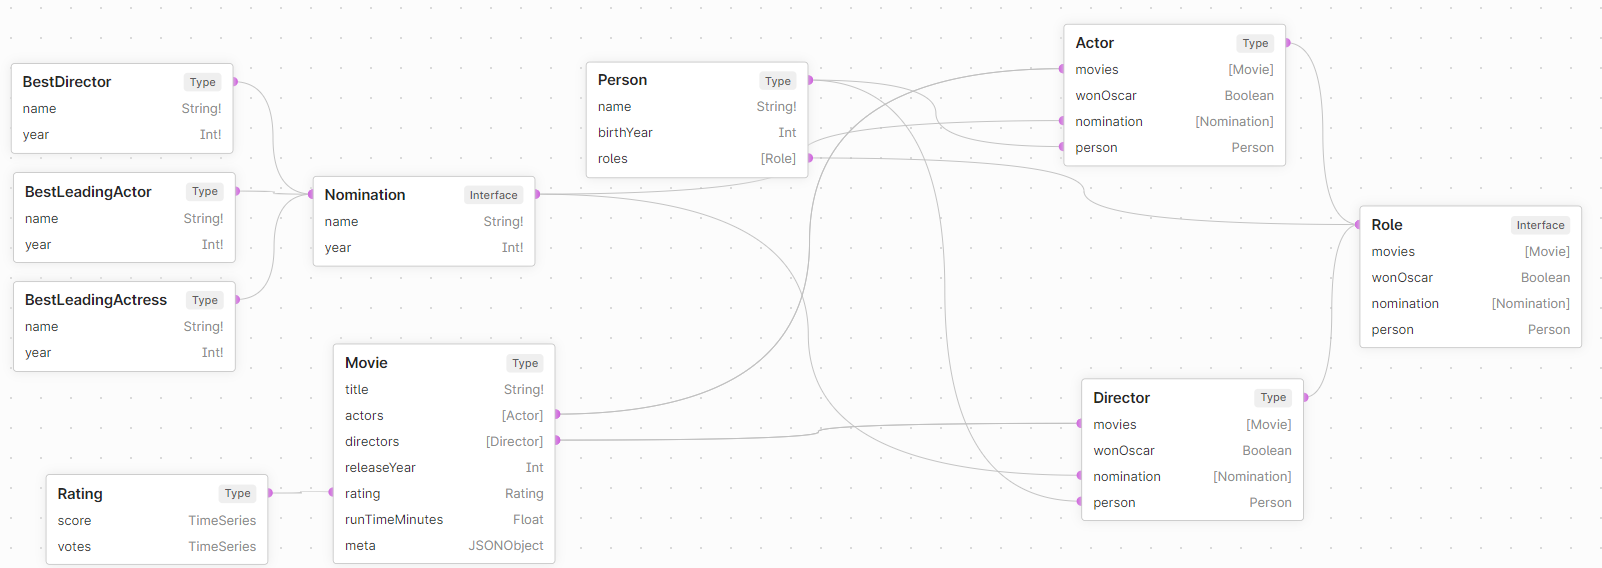g)

## Generation of SDK

To create a new Python SDK for the data model above, we assume you have installed `cognite-pygen[cli]` withe the CLI option.

Furthermore, we have the model above located in the space `movies` with the external id `Movie` and this is version `2`.

We generate a new SDK with the following command
```bash
pygen --space movies --external-id Movie --version 2 --tenant-id <tenant-id> --client-id <client-id> --client-secret <client-secret> --cdf-cluster <cdf-cluster> --cdf-procect <cdf-project> --sdk-name-snake movie_domain --client-name-pascal Movie
```

This create the SDK with the following folder structure

```
movie_domain
├── _api
│   ├── __init__.py
│   ├── _core.py
│   ├── actors.py
│   ├── best_directors.py
│   ├── best_leading_actors.py
│   ├── best_leading_actress.py
│   ├── directors.py
│   ├── movies.py
│   ├── nominations.py
│   ├── persons.py
│   ├── ratings.py
│   └── roles.py
├── data_classes
│   ├── `__init__`.py
│   ├── _core.py
│   ├── _actors.py
│   ├── _best_directors.py
│   ├── _best_leading_actors.py
│   ├── _best_leading_actress.py
│   ├── _directors.py
│   ├── _movies.py
│   ├── _nominations.py
│   ├── _persons.py
│   ├── _ratings.py
│   └── _roles.py
├── __init__.py
└── _api_client.py
```

This is now available and can be imported

## Creating Client

We have a configuration file next to this notebook with the format

```toml
[cognite]
project = "<cdf-project>"
tenant_id = "<tenant-id>"
cdf_cluster = "<cdf-cluster>"
client_id = "<client-id>"
client_secret = "<client-secret>"

```

This enables us to easily create a new movie client

In [1]:
from movie_domain.client import MovieClient

In [2]:
client = MovieClient.from_toml("config.toml")

## Reading Instances: List and Retrieve

Lets list some of the movies which are available: 

In [3]:
movies = client.movies.list()
movies

,external_id,version,last_updated_time,created_time,deleted_time,title,release_year,rating,run_time_minutes,meta,actors,directors
0,movie:reservoir_dogs,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Reservoir Dogs,1992,rating:reservoir_dogs,99.0,None,"[actor:quentin_tarantino, actor:harvey_keitel]",[director:quentin_tarantino]
1,movie:pulp_fiction,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Pulp Fiction,1994,rating:pulp_fiction,154.0,None,"[actor:harvey_keitel, actor:quentin_tarantino,...",[director:quentin_tarantino]
2,movie:fargo,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Fargo,1996,rating:fargo,98.0,None,[actor:frances_mcdormand],"[director:ethan_coen, director:joel_coen]"
3,movie:django_unchained,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Django Unchained,2012,rating:django_unchained,165.0,None,"[actor:samuel_l._jackson, actor:christoph_walt...",[director:quentin_tarantino]
4,movie:inglourious_basterds,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Inglourious Basterds,2009,rating:inglourious_basterds,153.0,None,"[actor:quentin_tarantino, actor:christoph_waltz]",[director:quentin_tarantino]
5,movie:gladiator,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Gladiator,2000,rating:gladiator,155.0,None,[actor:russell_crowe],[director:ridley_scott]
6,movie:12_angry_men,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,12 Angry Men,1957,rating:12_angry_men,96.0,None,[actor:henry_fonda],[director:sidney_lumet]


The movie type has edges to Rating, Actor, and Director type. When we do a `list` or `retrieve` call to the `MovieAPI` edges are automatically added with the external ID to the end node.

```
type Movie{
    title: String!
    actors: [Actor]
    directors: [Director]
    releaseYear: Int
    rating: Rating
    runTimeMinutes: Float
    meta: JSONObject
}
```

This means that we easily can use those external ids to retrieve for example a specific director:

In [4]:
pulp_fiction = movies[1]
pulp_fiction.dict()

{'external_id': 'movie:pulp_fiction',
 'version': '1',
 'last_updated_time': datetime.datetime(2023, 5, 15, 17, 3, 6, 715000, tzinfo=datetime.timezone.utc),
 'created_time': datetime.datetime(2023, 5, 15, 17, 3, 6, 715000, tzinfo=datetime.timezone.utc),
 'deleted_time': None,
 'title': 'Pulp Fiction',
 'release_year': 1994,
 'rating': 'rating:pulp_fiction',
 'run_time_minutes': 154.0,
 'meta': None,
 'actors': ['actor:harvey_keitel',
  'actor:quentin_tarantino',
  'actor:samuel_l._jackson',
  'actor:john_travolta'],
 'directors': ['director:quentin_tarantino']}

In [5]:
quentin = client.directors.retrieve(pulp_fiction.directors[0])

In [6]:
quentin.dict()

{'external_id': 'director:quentin_tarantino',
 'version': '1',
 'last_updated_time': datetime.datetime(2023, 5, 15, 17, 11, 36, 668000, tzinfo=datetime.timezone.utc),
 'created_time': datetime.datetime(2023, 5, 15, 17, 11, 36, 668000, tzinfo=datetime.timezone.utc),
 'deleted_time': None,
 'won_oscar': True,
 'person': None,
 'movies': ['movie:inglourious_basterds',
  'movie:django_unchained',
  'movie:pulp_fiction',
  'movie:reservoir_dogs'],
 'nomination': ['director:quentin_tarantino:pulp_fiction',
  'director:quentin_tarantino:inglourious_basterds']}

Note that all the data classes returned by the API is `pydantic` data classes. That means that methods such as `.dict()` and `.json()` are readaliy available. 

In addidion, note that all the types have sub classes to access the edges. For example, if you want to list the actors edges for specific movie you can do the following call.

In [7]:
client.movies.actors.retrieve(pulp_fiction.external_id)

,instance_type,space,external_id,version,last_updated_time,created_time,properties,type,start_node,end_node
0,edge,IntegrationTestsImmutable,relation:harvey_keitel:pulp_fiction:actor,2,1684210928525,1684210669405,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
1,edge,IntegrationTestsImmutable,relation:quentin_tarantino:pulp_fiction:actor,2,1684210928525,1684210669405,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
2,edge,IntegrationTestsImmutable,relation:samuel_l._jackson:pulp_fiction:actor,2,1684210928525,1684210669405,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
3,edge,IntegrationTestsImmutable,relation:john_travolta:pulp_fiction:actor,2,1684210928525,1684210669405,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."


## Writing Instances: Apply

The SDK generated by `SDK` supports nested upsert:

In [8]:
from movie_domain.client.data_classes import MovieApply, ActorApply, PersonApply

In [36]:
once_upon_time_in_hollywood = MovieApply(
    external_id="movie:once_upon_a_time_in_hollywood", 
    title="Once Upon a Time in... Hollywood", 
    actors=[ActorApply(external_id="actor:leonardo_dicaprio", 
                       movies=["movie:once_upon_a_time_in_hollywood"], 
                       won_oscar=True, 
                       person=PersonApply(
                           external_id="person:leonardo_dicaprio", 
                           name="Leonardo DiCaprio",
                           birth_year=1974,
                           roles=["actor:leonardo_dicaprio"]
                       ))], 
    directors=["director:quentin_tarantino"],
    run_time_minutes=161,
    release_year=2019
)

When writing nested data we can specify edges either with an external id for the end node, or another data class.

The advangage of using a nested data class is that we can express edges without being explicit. In the example above, we are able to express that the actor `actor:leonardo_dicaprio` played in the movie `movie:once_upon_a_time_in_hollywood` and is linked to the person `person:person:leonardo_dicaprio`.

The advantage of using an external id is that we can reference an existing node, such as in the example above, we reference the director node `director:quentin_tarantino` which already exists.

In addidion, using an external id allows us to express circular dependencies. In the example above, the movie `movie:once_upon_a_time_in_hollywood` is not only linked to the actor `actor:leonardo_dicaprio`, but we have an edge for the opposite direction. It is the same for the actor `actor:leonardo_dicaprio` which is linked to the person `person:leonardo_dicaprio` which is linked back to the actor `actor:leonardo_dicaprio`.

In [37]:
created = client.movies.apply(once_upon_time_in_hollywood)

Note that the call above created 3 nodes and 5 edges:

In [38]:
created.nodes

,instance_type,space,external_id,version,was_modified,last_updated_time,created_time
0,node,IntegrationTestsImmutable,movie:once_upon_a_time_in_hollywood,1,False,1687792934376,1687792934376
1,node,IntegrationTestsImmutable,actor:leonardo_dicaprio,1,False,1687792934376,1687792934376
2,node,IntegrationTestsImmutable,person:leonardo_dicaprio,1,True,1687793754753,1687793754753


In [39]:
created.edges

,instance_type,space,external_id,version,was_modified,last_updated_time,created_time
0,edge,IntegrationTestsImmutable,movie:once_upon_a_time_in_hollywood:actor:leon...,1,False,1687792934376,1687792934376
1,edge,IntegrationTestsImmutable,actor:leonardo_dicaprio:person:leonardo_dicaprio,1,True,1687793754753,1687793754753
2,edge,IntegrationTestsImmutable,person:leonardo_dicaprio:actor:leonardo_dicaprio,1,True,1687793754753,1687793754753
3,edge,IntegrationTestsImmutable,actor:leonardo_dicaprio:movie:once_upon_a_time...,1,False,1687792934376,1687792934376
4,edge,IntegrationTestsImmutable,movie:once_upon_a_time_in_hollywood:director:q...,1,False,1687792934376,1687792934376


And we can now see that the movie is now listed among the others.

In [40]:
client.movies.list()

,external_id,version,last_updated_time,created_time,deleted_time,title,release_year,rating,run_time_minutes,meta,actors,directors
0,movie:reservoir_dogs,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Reservoir Dogs,1992,rating:reservoir_dogs,99.0,None,"[actor:quentin_tarantino, actor:harvey_keitel]",[director:quentin_tarantino]
1,movie:pulp_fiction,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Pulp Fiction,1994,rating:pulp_fiction,154.0,None,"[actor:harvey_keitel, actor:quentin_tarantino,...",[director:quentin_tarantino]
2,movie:fargo,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Fargo,1996,rating:fargo,98.0,None,[actor:frances_mcdormand],"[director:ethan_coen, director:joel_coen]"
3,movie:django_unchained,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Django Unchained,2012,rating:django_unchained,165.0,None,"[actor:samuel_l._jackson, actor:christoph_walt...",[director:quentin_tarantino]
4,movie:inglourious_basterds,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Inglourious Basterds,2009,rating:inglourious_basterds,153.0,None,"[actor:quentin_tarantino, actor:christoph_waltz]",[director:quentin_tarantino]
5,movie:gladiator,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,Gladiator,2000,rating:gladiator,155.0,None,[actor:russell_crowe],[director:ridley_scott]
6,movie:12_angry_men,1,2023-05-15 17:03:06.715000+00:00,2023-05-15 17:03:06.715000+00:00,None,12 Angry Men,1957,rating:12_angry_men,96.0,None,[actor:henry_fonda],[director:sidney_lumet]
7,movie:once_upon_a_time_in_hollywood,1,2023-06-26 15:22:14.376000+00:00,2023-06-26 15:22:14.376000+00:00,None,Once Upon a Time in... Hollywood,2019,None,161.0,None,[actor:leonardo_dicaprio],[director:quentin_tarantino]


Note you can inspect what will passed to the underlying `Cognite-SDK` by calling the `.to_instances_apply()` method.

In [42]:
instances = once_upon_time_in_hollywood.to_instances_apply()

In [44]:
instances.nodes

[NodeApply(space='IntegrationTestsImmutable', external_id='movie:once_upon_a_time_in_hollywood') at 0x1e791c8b100,
 NodeApply(space='IntegrationTestsImmutable', external_id='actor:leonardo_dicaprio') at 0x1e791c8bd90,
 NodeApply(space='IntegrationTestsImmutable', external_id='person:leonardo_dicaprio') at 0x1e791c8bbb0]

In [45]:
instances.edges

[EdgeApply(space='IntegrationTestsImmutable', external_id='movie:once_upon_a_time_in_hollywood:actor:leonardo_dicaprio') at 0x1e791c8bca0,
 EdgeApply(space='IntegrationTestsImmutable', external_id='actor:leonardo_dicaprio:person:leonardo_dicaprio') at 0x1e791c8b820,
 EdgeApply(space='IntegrationTestsImmutable', external_id='person:leonardo_dicaprio:actor:leonardo_dicaprio') at 0x1e791c8b8e0,
 EdgeApply(space='IntegrationTestsImmutable', external_id='actor:leonardo_dicaprio:movie:once_upon_a_time_in_hollywood') at 0x1e791da7fa0,
 EdgeApply(space='IntegrationTestsImmutable', external_id='movie:once_upon_a_time_in_hollywood:director:quentin_tarantino') at 0x1e791da79a0]

## Deleting Instances

You can delete by passing and external ID or a sequence of external id to the delete method.

First we inspect the avaible persons and edges to roles

In [46]:
client.persons.list()

,external_id,version,last_updated_time,created_time,deleted_time,birth_year,name,roles
0,person:christoph_waltz,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1956,Christoph Waltz,"[actor:christoph_waltz, director:christoph_waltz]"
1,person:harvey_keitel,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1939,Harvey Keitel,[actor:harvey_keitel]
2,person:henry_fonda,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1905,Henry Fonda,[actor:henry_fonda]
3,person:jamie_foxx,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1967,Jamie Foxx,[actor:jamie_foxx]
4,person:samuel_l._jackson,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1948,Samuel L. Jackson,[actor:samuel_l._jackson]
5,person:sidney_lumet,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1924,Sidney Lumet,[director:sidney_lumet]
6,person:ethan_coen,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1957,Ethan Coen,[director:ethan_coen]
7,person:quentin_tarantino,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1963,Quentin Tarantino,"[actor:quentin_tarantino, director:quentin_tar..."
8,person:joel_coen,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1954,Joel Coen,[director:joel_coen]
9,person:ridley_scott,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1937,Ridley Scott,[director:ridley_scott]


In [47]:
client.persons.roles.list()

,instance_type,space,external_id,version,last_updated_time,created_time,properties,type,start_node,end_node
0,edge,IntegrationTestsImmutable,relation:christoph_waltz:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
1,edge,IntegrationTestsImmutable,relation:jamie_foxx:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
2,edge,IntegrationTestsImmutable,relation:quentin_tarantino:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
3,edge,IntegrationTestsImmutable,relation:ethan_coen:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
4,edge,IntegrationTestsImmutable,relation:sidney_lumet:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
5,edge,IntegrationTestsImmutable,relation:ridley_scott:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
6,edge,IntegrationTestsImmutable,relation:john_travolta:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
7,edge,IntegrationTestsImmutable,relation:quentin_tarantino:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
8,edge,IntegrationTestsImmutable,relation:samuel_l._jackson:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
9,edge,IntegrationTestsImmutable,relation:frances_mcdormand:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."


Then, we delete the person `person:leonardo_dicaprio`

In [48]:
client.persons.delete("person:leonardo_dicaprio")

InstancesDeleteResult(nodes=[NodeId(space='IntegrationTestsImmutable', external_id='person:leonardo_dicaprio')], edges=[])

In [49]:
client.persons.list()

,external_id,version,last_updated_time,created_time,deleted_time,birth_year,name,roles
0,person:christoph_waltz,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1956,Christoph Waltz,"[actor:christoph_waltz, director:christoph_waltz]"
1,person:harvey_keitel,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1939,Harvey Keitel,[actor:harvey_keitel]
2,person:henry_fonda,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1905,Henry Fonda,[actor:henry_fonda]
3,person:jamie_foxx,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1967,Jamie Foxx,[actor:jamie_foxx]
4,person:samuel_l._jackson,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1948,Samuel L. Jackson,[actor:samuel_l._jackson]
5,person:sidney_lumet,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1924,Sidney Lumet,[director:sidney_lumet]
6,person:ethan_coen,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1957,Ethan Coen,[director:ethan_coen]
7,person:quentin_tarantino,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1963,Quentin Tarantino,"[actor:quentin_tarantino, director:quentin_tar..."
8,person:joel_coen,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1954,Joel Coen,[director:joel_coen]
9,person:ridley_scott,1,2023-05-15 17:05:08.732000+00:00,2023-05-15 17:05:08.732000+00:00,None,1937,Ridley Scott,[director:ridley_scott]


In [50]:
client.persons.roles.list()

,instance_type,space,external_id,version,last_updated_time,created_time,properties,type,start_node,end_node
0,edge,IntegrationTestsImmutable,relation:christoph_waltz:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
1,edge,IntegrationTestsImmutable,relation:jamie_foxx:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
2,edge,IntegrationTestsImmutable,relation:quentin_tarantino:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
3,edge,IntegrationTestsImmutable,relation:ethan_coen:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
4,edge,IntegrationTestsImmutable,relation:sidney_lumet:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
5,edge,IntegrationTestsImmutable,relation:ridley_scott:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
6,edge,IntegrationTestsImmutable,relation:john_travolta:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
7,edge,IntegrationTestsImmutable,relation:quentin_tarantino:director,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
8,edge,IntegrationTestsImmutable,relation:samuel_l._jackson:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."
9,edge,IntegrationTestsImmutable,relation:frances_mcdormand:actor,1,1684210355579,1684210355579,{},"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern..."


Note that the edges to the person node are automatically deleted. 